# ADVANCED CLASSIFICATION PREDICT
© Explore Data Science Academy

---


#### Climate Change
* Climate is the average weather in a place over many years. Climate change is a shift in those average conditions.
* The rapid climate change is caused by humans using oil, gas and coal for their homes, factories and transport.
* When these fossil fuels burn, they release greenhouse gases - mostly carbon dioxide (CO2). These gases trap the Sun's heat and cause the planet's temperature to rise.


---


## <u> Predict Overview: Climate Change Belief Analysis 2022 </u>

#### <u> PROBLEM STATEMENT </u>
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

> Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies

---

#### <u> TASK AHEAD </u>
With this context, EDSA is challenging us during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

> Predict an individual’s belief in climate change based on historical tweet data


---

<a id="cont"></a>

#### <u> PROCESS

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#seven>9. Conclusion</a>

<a href=#seven>10. Refrences</a>

    
---

> Just before the importation of packages, let's connect to __Comet__

In [1]:
# !pip install comet_ml

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

In [3]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="gwwsjpgy1KtBxQNzAWYIZvNkn",
    project_name="climate-change-tweet-classification-predict",
    workspace="softmancho",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\USER\\Downloads\\Advanced_Classification_Predict-student_data-2780\\Advanced classification predict' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/softmancho/climate-change-tweet-classification-predict/89cb23dbe57c4c1a970203be22392e9d



> The above code is the connection between this __notebook__ and the workspace on __comet__ which helps to record our experiment<br>


> -*The comet account used for this project belongs to a member of the team*

---



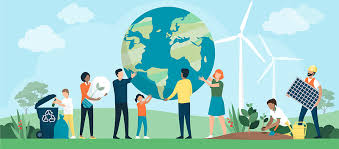




---

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [4]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot style
sns.set()

from wordcloud import WordCloud

# Building classification models
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Download NLTK Corpora
nltk.download(['punkt','stopwords'])

<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

---

In [ ]:
# load the train data
train_df = pd.read_csv('train.csv')
train_df.head()

>> Looking at the top five rows of our data above, we can see all our features as well as the types of data we are working with.Our features are: **sentiment**(**2** News,**1** Pro,**0** Neutral,**-1** Anti), **message** and **tweetid**.<br> 
> Looking specifically at the data type of each feature, we can determine whether a variable is numerical, or categorical. Currently the **categorical** feature is message while sentiment and tweetid are **numerical**.


In [ ]:
test_df = pd.read_csv('test_with_no_labels.csv')
test_df.head()

>> The result of the above test data reveals two independent variables, **message** and **tweetid**, which are supposed to be used in predicting **sentiment**

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---



**Variable definitions**

> - sentiment: Sentiment of tweet
> - message: Tweet body
> - tweetid: Twitter unique id

We can get the total number of rows and columns from the data set using “.shape” like below 

In [ ]:
#look at the size of the train dataset in terms of rows and columns
train_df.shape

In [ ]:
#look at the size of the test dataset in terms of rows and columns
test_df.shape

>> The shape command shows that we have **15819** rows and **3** features in the **train** dataset
and **10546** rows and **2** columns in the **test** dataset.

Lets find what all columns contain, of what types and if they contain any value or not, with the help of info() function.

In [ ]:
# Check data types for all columns
train_df.info()

>> By observing the above data, we can conclude −<br>
>>  Data contains an __Object__ value and two __Int__eger values<br>
>> All the columns variable are non-null (no-empty or missing value).


### 3.1  Analysis of the  tweet classes (*sentiment*) variable
    
---

#### In this section of the EDA, we will perform an in-depth analysis of the **sentiment** variable in the train DataFrame.

- The first step is to create a copy of the train dataframe for the EDA.

---


In [ ]:
def update(df):
    
    df_copy=df.copy()
    
    word_sentiment=[]

    for i in  df_copy['sentiment'] :
        if i == 1 :
            word_sentiment.append('Pro')  
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')
            
    df_copy['sentiment']=word_sentiment
    
    return df_copy

df_class = update(train_df)
df_class.head()

>> Great, we have been able to assign a description to the classes.<br> Now, Lets try and get the number of times each class appeared and maybe a plot to visualize our analysis

In [ ]:
df_class['sentiment'].value_counts()

In [ ]:
# Visualizating the classes
import seaborn as sns
sns.countplot(df_class['sentiment'])

> A **countplot** can be thought off as a histogram across a categorical instead of quantitative variable and gives the result of a barplot.<br>So we generated a count plot of the sentiment feature, where each bar represents a class description from the dataset and the height represents how many times that each class description occurred. This was done by using **seaborn's countplot**


---

#### lets see if we can get an insight of the most frequently used __hashtagged__ word for the different tweet classes. This is done before tweet cleaning to ensure no information is lost.

- Hashtags are extracted from the original tweets and stored in seperate dataframes for each class. 

---

In [ ]:
def hashtag_extract(tweet):

    # Extract all hashtags from the message column of the dataframe,    
    hashtags = []
    for i in tweet.str.lower():
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    # add all extracted hashtags to a list called hashtags
    hashtags = sum(hashtags,[])

    # generate the frequency count for each hashtag in the dataframe
    frequency = nltk.FreqDist(hashtags)

    # convert the generated frquency count dictionary of each hashtags back to a new dataframe
    hashtag_df = pd.DataFrame({ 'hashtags': list(frequency.keys()),
                               'counts': list(frequency.values())
                             })
    # select the first 20 largest frequency count of each hashtag
    hashtag_df = hashtag_df.nlargest(20, columns='counts')
    
    return hashtag_df

In [ ]:
# Extracting the hashtags from tweets in each class

pro =     hashtag_extract( df_class ['message'][df_class ['sentiment'] == 'Pro']     )
anti =    hashtag_extract( df_class ['message'][df_class['sentiment'] == 'Anti']    )
neutral = hashtag_extract( df_class ['message'][df_class ['sentiment'] == 'Neutral'] )
news =    hashtag_extract( df_class ['message'][df_class['sentiment'] == 'News']    )

pro.head()

>> Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets.<br> The above cell output helped us to gain a better understanding of what kind of information is being consumed and shared in each class.

### 3.2  Analysis of the  tweet body (*message*) variable


---

In [ ]:
# Display the text to be cleaned
"".join(train_df['message'].tolist())[:500]

#### We found some noises in the above display of the 'message' column,and we will be doing the following to clean it: <br>
> - Convert all text to lowercase
> - Remove noisy entities' such as punctuations, mentions, numbers and extra white space.
> - Remove contractions: Words like ain't, isn't, will have to be expanded to "am not" and "is not."
> - Remove non-ascii Characters: including the emojis
> - Remove new line(\n) character
> - Specific named entity extraction
> - Tokenization
> - Perform part of speech tagging (POS) and lemmatization

In [ ]:
def TweetCleaner(tweet):
    # Convert everything to lowercase
    tweet = tweet.lower() 
   
    # removing rt
    tweet= tweet.replace("rt", "")
    
    # removing \n
    tweet= tweet.replace("\n", "")
    
    #remove emogies
    tweet= tweet.encode("ascii", "ignore").decode("ascii")
    
    # Replace websites with web-url's
    tweet = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', 'url-web', tweet)
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

In [ ]:
# Clean message column by applying the above function 'TweetCleaner'
train_df['message'] = train_df['message'].apply(TweetCleaner)
train_df.head()

---


#### Our text is half way clean,we are left with:<br>
- __Tokenization__ which helps to break raw text into words,sentences called tokens<br>
- __Lemmatization__ which helps to reduce the word into dictionary root form<br>
- The presence of __stopwords__ can dilute the meaning of the text making our model less efficient.



In [ ]:
def lemmatize(df):
    
    #function that converts list to string
    def list_to_string(words): return ' '.join(words) 
    
    # the function that carries out the work
    def tweet_lemma(words, lemmatizer): return [lemmatizer.lemmatize(word) for word in words]
    
    #tokenise each word from each row using word tokenize
    tokeniser = TreebankWordTokenizer()
    df['message']= df['message'].apply(tokeniser.tokenize)
    
    #Remove stop word from tweet text
    df['message']= df['message'].apply(lambda words:[word for word in words if word not in stopwords.words('english')])
    
    # lemmatizing the tokens 
    wnl = WordNetLemmatizer()
    df['message']= df['message'].apply(tweet_lemma, args=(wnl, ))
    df['message'] =df['message'].apply(lambda x: list_to_string(x))
    
    return df


In [ ]:
# Futher clean message column by applying the above function 'lemmatize'
train_df = lemmatize(train_df)
train_df.head()

#### Now, lets display our cleaned text

In [ ]:
# Display cleaned text
"".join(train_df['message'].tolist())[:500]

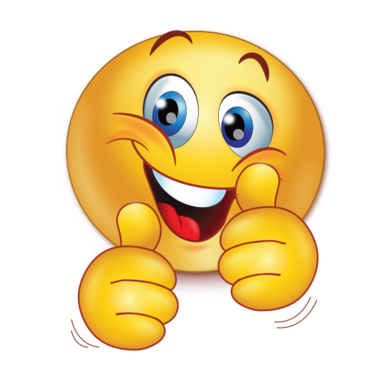

>> Awesome, our text looks clean.<br>
Now, we can and will proceed to more visualizations, modelling and execution <br>but before then, we will apply the cleaning functions(__'TweetCleaner'__ and __'lemmatize'__) above to our test dataset.

### 3.3 Cleaning  Test_data

In [ ]:
test_df ['message'] = test_df ['message'].apply(TweetCleaner)
test_df = lemmatize(test_df)
test_df.head()

#### The above output looks clean. So, lets do some more Visualization

### 3.4 Put in Word Cloud Below

In [ ]:
# Create new dataframe for word cloud
df_train_cloud = train_df.copy()
df_train_cloud.head()

In [ ]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [ ]:
df_class1 = df_train_cloud[df_train_cloud['sentiment']==1]
df_class0 = df_train_cloud[df_train_cloud['sentiment']==0]
df_classneg = df_train_cloud[df_train_cloud['sentiment']==-1]
df_class2 = df_train_cloud[df_train_cloud['sentiment']==2]

tweet_All = " ".join(review for review in train_df.message)
tweet_class0 = " ".join(review for review in df_class0.message)
tweet_class1 = " ".join(review for review in df_class1.message)
tweet_classneg = " ".join(review for review in df_classneg.message)
tweet_class2 = " ".join(review for review in df_class2.message)

fig, ax = plt.subplots(5, 1, figsize  = (35,25))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_class0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_class0)
wordcloud_class1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_class1)
wordcloud_classneg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_classneg)
wordcloud_class2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_class2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_class0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=25)
ax[1].axis('off')
ax[2].imshow(wordcloud_class1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=25)
ax[2].axis('off')
ax[3].imshow(wordcloud_classneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=25)
ax[3].axis('off')
ax[4].imshow(wordcloud_class2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=25)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

## 4. Modeling

### Lets build classification models now

- __Pipeline__  will be used in building our classification models<br>
The __pipeline__ is a Python scikit-learn utility which functions by allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process.<br>
and the following 5 models will be considered for this project:

>> - Random forest
>> - Naive Bayes
>> - K nearest neighbors
>> - Logistic regression
>> - Linear SVC

---
Before we pass our data through our custom pipelines, we will have to split the dataset and divide it into two subsets. It is a technique for evaluating the performance of a machine learning algorithm.This will help us chose the best model for our submission

---
#### 4.1 Train - Validation split

In [ ]:
# Split the dataset into train & validation (20%) for model training

# Seperate features and tagret variables
X = train_df['message']
y = train_df['sentiment']

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

>> ###### Pipelines
Pipelines consist of 2 steps, vectorization and model fitting.
Machines, unlike humans, cannot understand the raw text.Therefore, we need to convert our text into numbers.
The TFIDF vectorizer assigns word frequency scores that try to highlight frequent words in a document. Another advantage of this method is that the resulting vectors are already scaled.

In [ ]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5,n_estimators=100))
              ])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())
              ])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
               ])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1,class_weight='balanced',max_iter=1000))
              ])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))
                ])

#### 4.2 Train the models

The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.

In [ ]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

>>Awesome, all 5 models are trained.
Lets evaluate our models

## 5. Model evaluation

The performance of each model will be evaluated based on the <br>
> -  __precision__,<br> 
> - __accuracy__ and<br>
> - __F1 score__ <br>

This will be achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

> - __Classification report__ and __Confusion matrix__ will be applied to each model. The best model will be selected based on the weighted F1 score

---

- Random forest

In [ ]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_valid, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

- Naive Bayes

In [ ]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_valid, y_pred_nb))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

- K-nearest neighbors

In [ ]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

- Logistic regression

In [ ]:
# Generate a classification Report for the Logistic regression model
print(metrics.classification_report(y_valid, y_pred_lr))

cm = confusion_matrix(y_valid, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

- Linear SVC

In [ ]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_valid, y_pred_lsvc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 6. Model Selection

>> It is evident from the above displays that __Linear SVC__ achieved the highest __F1 score__ of __0.70__ and is therefore our model of choice moving forward.

---

Since our top performing model has been selected, we will attempt to improve it by performing some __hyperparameter tuning__.
- After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 2% increase in the F1 score.

#### Hyperparameter tuning

In [ ]:
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8, min_df=2,ngram_range=(1,2))),
                    
                  ('clf', LinearSVC(C=0.3,class_weight='balanced',max_iter=3000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_valid)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) 
                 /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), '%')

## End Comet experiment

In [ ]:
# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred, average='weighted')
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# Log image
experiment.log_image(metrics)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

### generate the csv file to submmit to kaggle

In [ ]:
def gen_kaggle_csv(model, df):
    
    #load the test data to a varable "X_unseen"
    X_test = df['message']
    
    #Make a prediction on the test data with the trained model
    mypreds = model.predict(X_test)
    
    #Reset the index of the test data
    df.reset_index(inplace=True)
    
    #Make a copy of the tweet id 
    tweetid = df['tweetid']
    
    #Convert the tweet_id and the prediction 
    kaggle = pd.DataFrame({'tweetid' : tweetid, 
                                  'sentiment': mypreds})
    
    #convert file to csv
    kaggle.to_csv('kaggle.csv', index=False)

    return kaggle
gen_kaggle_csv(lsvc, test_df)

### Pickle Trained Model

In [ ]:
def save_pickle_file(model, file_name):
    # import the pickle module
    import pickle
    
    #asign a path to the file_name 
    model_save_path = file_name 
    
    #save file to thespecified path
    with open(model_save_path,'wb') as file: 
        pickle.dump(model,file)
    
    return  model_save_path

save_pickle_file(lsvc, "lsvc_model.pkl")

## 7. Conclusion

## 8. Refrences